In [1]:
import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql


parquet_file_path = '/Users/safmomen/Downloads/deere_dbx_audit/*.parquet'



In [2]:
%config SqlMagic.autopandas = False
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///:memory:


In [3]:
%%sql
CREATE view usage AS SELECT * FROM read_parquet('/Users/safmomen/Downloads/deere_dbx_audit/*.parquet');


Count


In [4]:
%%sql
select count(*) num_records
from
usage

num_records
5964701


In [5]:
%%sql
describe
select *
from
usage;

column_name,column_type,null,key,default,extra
accountId,VARCHAR,YES,None,None,None
actionName,VARCHAR,YES,None,None,None
auditLevel,VARCHAR,YES,None,None,None
requestId,VARCHAR,YES,None,None,None
sha1_cluster_id,VARCHAR,YES,None,None,None
clusterId,VARCHAR,YES,None,None,None
clusterName,VARCHAR,YES,None,None,None
requestParams.clusterState,VARCHAR,YES,None,None,None
requestParams.clusterOwnerUserId,VARCHAR,YES,None,None,None
requestParams.clusterWorkers,VARCHAR,YES,None,None,None


In [6]:
%%sql
select *
from
usage
limit 10

accountId,actionName,auditLevel,requestId,sha1_cluster_id,clusterId,clusterName,requestParams.clusterState,requestParams.clusterOwnerUserId,requestParams.clusterWorkers,requestParams.autotermination_minutes,requestParams.cause,requestParams.idInJob,requestParams.jobId,requestParams.jobTaskType,requestParams.jobTerminalState,requestParams.jobTriggerType,sha1_mainClassName,sha1_securable,sha1_taskKey,requestParams.spark_version,requestParams.pipeline_id,sha1_notebookFullPath,requestParams.notebookId,sha1_notebook_params,requestParams.dataSourceId,requestParams.queryId,sha1_path,requestParams.run_id,requestParams.runId,requestParams.aws_attributes,sha1_sourceIPAddress,timestamp,version,workspaceId
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,create,WORKSPACE_LEVEL,ServiceMain-282b201fffb70003,None,None,None,None,None,None,0,None,None,None,None,None,None,None,None,None,custom:custom-local__11.x-snapshot-serving-scala2.12__unknown__update-serving-image__4033668__d28971a__tomas.nykodym__1d92fef__format-2.lz4,None,None,None,None,None,None,None,None,None,"{""ebs_volume_count"":1,""availability"":""ON_DEMAND"",""ebs_volume_type"":""GENERAL_PURPOSE_SSD"",""zone_id"":""auto"",""ebs_volume_size"":100}",None,1676243041023,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,createRecent,WORKSPACE_LEVEL,d64c09f6-9da1-40ca-b91a-d38e200cf75f,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,6626bc6b0baf949b632803a02e314dd38c936b80,1680622971547,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,delete,WORKSPACE_LEVEL,ServiceMain-2e91e56dc4dd0003,c220ab3e9349e0813bb85832d9e19e1397ab990a,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1673099524183,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,delete,WORKSPACE_LEVEL,ServiceMain-5eb812bea1530006,4c27b7c44bc1e66cc01dd745e015af407c354f4b,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1676501574870,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,createResult,WORKSPACE_LEVEL,ServiceMain-480379b1d3ee0003,None,82c78b9a5b137aec4fa30bf3381619c8dd5d0342,f7debddfc4958c67a96d9a8ed879b235d4804892,Running,3898348396280134,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1677173655534,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,create,WORKSPACE_LEVEL,ServiceMain-7fbc843084740006,None,None,None,None,None,None,0,None,None,None,None,None,None,None,None,None,10.5.x-scala2.12,None,None,None,None,None,None,None,None,None,"{""ebs_volume_count"":1,""availability"":""SPOT_WITH_FALLBACK"",""instance_profile_arn"":""arn:aws:iam::236633655520:instance-profile/collibra/AWS-ISG-PAA-APPLICATIONS"",""first_on_demand"":1,""ebs_volume_type"":""GENERAL_PURPOSE_SSD"",""zone_id"":""auto"",""ebs_volume_size"":512}",None,1682275381345,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,resizeResult,WORKSPACE_LEVEL,ServiceMain-9ef80c6704510006,None,dbf82fc58543f0b61275972ba98f50d7291945d7,7993d0affb7dbde51ac306d7bf99d92f25af017f,Running,3170997457270602,10,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1683045253984,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,runTriggered,WORKSPACE_LEVEL,ServiceMain-a203b72d66dd0003,None,None,None,None,None,None,None,None,None,615406154161693,None,None,cron,None,None,None,None,None,None,None,None,None,None,None,None,161749561,None,None,1676268300576,2.0,3821837723237674
e23b3d5a-9b93-41fe-9be4-daafdea3c82f,resizeResult,WORKSPACE_LEVEL,ServiceMain-27793d1d8d3c0006,None,f5ebba71d11788416af53f70c8a14e9ddfcf0791,c0dd8e090a613b5f17733eb88fe0353a8f56f431,Running,3898348396280134,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [7]:
%%sql
summarize
select *
from
usage
limit 100000

column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
accountId,VARCHAR,e23b3d5a-9b93-41fe-9be4-daafdea3c82f,e23b3d5a-9b93-41fe-9be4-daafdea3c82f,1,None,None,None,None,None,100000,0.0%
actionName,VARCHAR,addBlock,wsfsStreamingWrite,110,None,None,None,None,None,100000,0.0%
auditLevel,VARCHAR,WORKSPACE_LEVEL,WORKSPACE_LEVEL,1,None,None,None,None,None,100000,0.0%
requestId,VARCHAR,00019102-ab07-4a16-b3be-0eec08c6dce0,ffd6c31e-6311-4a2d-86e3-39b7ad234559,9338,None,None,None,None,None,100000,0.26%
sha1_cluster_id,VARCHAR,000605a633fb8c40f828a6bdda13cb633cae316b,fff15bb281d293dc4ae131ebc585530a2fe3c8c8,6589,None,None,None,None,None,100000,92.87%
clusterId,VARCHAR,00003f3d2f5809bbff0593eb01b1e529f7b840af,fffe0495d1b28717009ea0a57eb9fa05022b3580,19314,None,None,None,None,None,100000,52.35%
clusterName,VARCHAR,000556870318137bf319144641d35c045882b51d,fffdbb1311f2618005aefb4a210b462c7d575a82,14465,None,None,None,None,None,100000,58.35%
requestParams.clusterState,VARCHAR,Running,Terminated,2,None,None,None,None,None,100000,58.35%
requestParams.clusterOwnerUserId,VARCHAR,1052565759517653,91521415537895,54,None,None,None,None,None,100000,58.35%
requestParams.clusterWorkers,VARCHAR,0,99,287,None,None,None,None,None,100000,58.35%


In [37]:
%%sql
df <<
select 
    "requestParams.jobTaskType",
    count(*) cnt
from
usage
group by 1


requestParams.jobTaskType,cnt
None,5640142
notebook,190960
pipeline,15827
newJar,112538
unknown,5192
runjob,42


<Axes: xlabel='requestParams.jobTaskType', ylabel='cnt'>

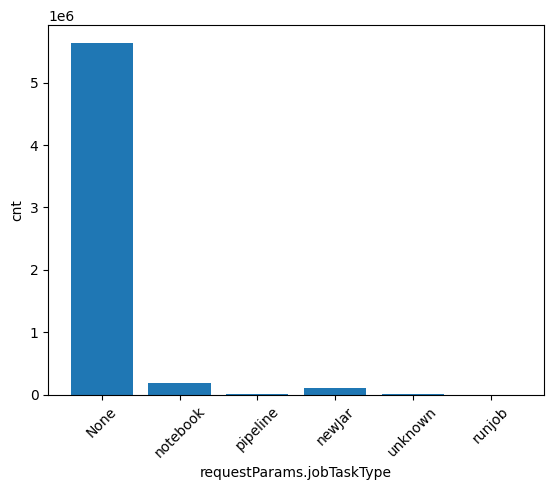

In [38]:
display(df)
df.bar()

In [21]:
%%sql
df <<
select 
    "requestParams.jobTerminalState",
    count(*) cnt
from
usage
group by 1


requestParams.jobTerminalState,cnt
None,5640142
Running,160345
Succeeded,151039
Skipped,5062
Failed,6511
Cancelled,782
Error,638
TimedOut,182


<Axes: xlabel='requestParams.jobTerminalState', ylabel='cnt'>

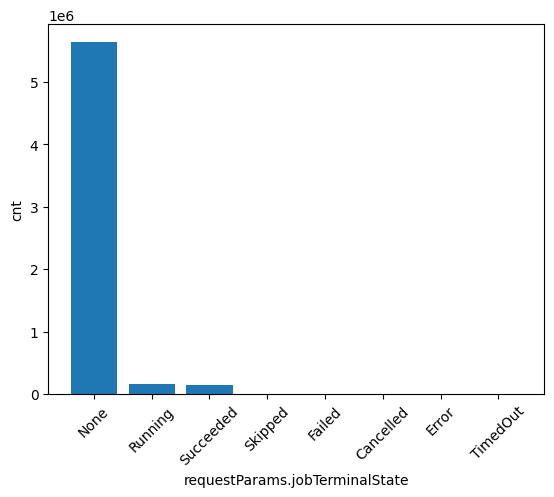

In [28]:
display(df)
df.bar()

In [35]:
%%sql
df <<
select 
    "actionName",
    count(*) cnt
from
usage
group by 1
order by 2


actionName,cnt
removeAdmin,1
createEndpoint,1
updateOrganizationSetting,1
createSubscription,1
deleteScope,1
login,1
changePermissions,1
sendNotification,1
createRegisteredModel,2
getRepo,2


<Axes: xlabel='actionName', ylabel='cnt'>

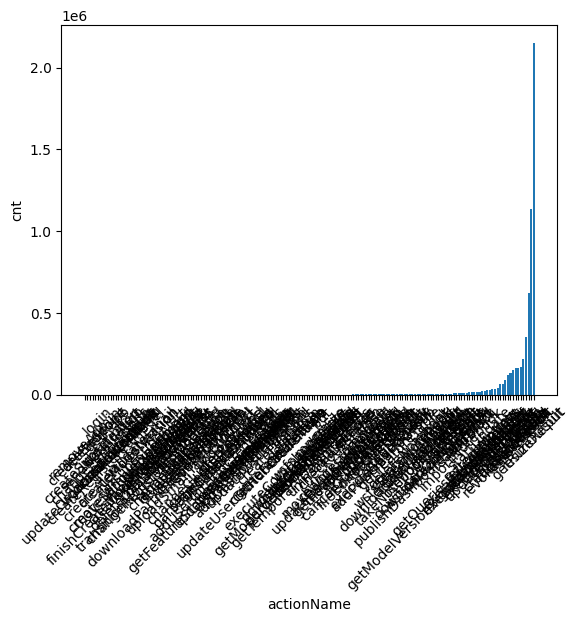

In [36]:
display(df)
df.bar()

In [40]:
%%sh 
jupyter nbconvert --to html loader.ipynb --output deere_contents.html

[NbConvertApp] Converting notebook loader.ipynb to html
[NbConvertApp] Writing 916437 bytes to deere_contents.html


In [8]:
raise KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
some missing stuff:
    
if using databrickssql:
    https://docs.databricks.com/api-explorer/workspace/queryhistory/list

https://docs.databricks.com/administration-guide/account-settings/usage-analysis.html
https://docs.databricks.com/administration-guide/account-settings/billable-usage-download-api.html
https://docs.databricks.com/administration-guide/account-settings/audit-logs.html

In [ ]:

duckdb.sql(
    f"""
    select 
        "requestParams.runId"
    from '{parquet_file_path}' 
    limit 100000"""
)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%reload_ext dotenv

%dotenv ../../env/.env

import warnings
import utils
from pandas import Timedelta
import time
from utils import logger, sql_to_df, run_sql, session, conn
import pandas as pd
warnings.filterwarnings('ignore')

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

In [ ]:
run_sql("use role dev")

In [ ]:
# Define the source Parquet file path on your local machine
# parquet_file_path = '/path/to/your/parquet/file.parquet'

parquet_file_paths = [
    '/Users/safmomen/Downloads/deere_dbx_audit/part-00000-tid-7465844095593919475-c056804b-1121-4690-86d2-013c692cfda9-5-1-c000.snappy.parquet',
    '/Users/safmomen/Downloads/deere_dbx_audit/part-00001-tid-7465844095593919475-c056804b-1121-4690-86d2-013c692cfda9-6-1-c000.snappy.parquet',
    '/Users/safmomen/Downloads/deere_dbx_audit/part-00002-tid-7465844095593919475-c056804b-1121-4690-86d2-013c692cfda9-7-1-c000.snappy.parquet'
]

# Define the target Snowflake stage and the file name in the stage
stage_name = 'raw_customer.deere.raw'

for p in parquet_file_paths:
    # Execute the PUT command to upload the Parquet file to the stage
    put_command = f"PUT file://{p} @{stage_name}/files/"
    conn.cursor().execute(put_command)